# Trabalho 1 

O objetivo deste exercício é estudar o comportamento de algoritmos de busca em linha em duas funções diferentes. O método utilizado será o de Falsa Posição.

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


## Construindo funções necessárias para o exercício

Serão implementadas duas funções: uma quadrática e a função de Rosenbrock, dadas respectivamente por:

$$ f_Q(\vec{x}) = x_1² + 2x_2² + x_1x_2 - 2x_1 + x_2$$
$$ f_R(\vec{x}) = 100(x_1 - x_2^2)² + (1 - x_1)² $$

Seus gradientes são dados por:

$$ \nabla f_Q(\vec{x}) = [2x_1 + x_2 - 2,\hspace{5pt} 4x_2 + x_1 + 1]^T$$
$$ \nabla f_R(\vec{x}) = 200[(x_1 - x_2^2) -2(1 - x_1),\hspace{5pt} -400(x_1 - x_2^2)x_2]^T$$

In [22]:
# Calculando o valor de apenas um ponto do domínio das funções e gradientes
def _fR(x:np.ndarray):
    return 100*( (x[0] - x[1]**2)**2 + (1 - x[0])**2 )

def _fQ(x:np.ndarray):
    return x[0]**2 + 2*x[1]**2 + x[0]*x[1] - 2*x[0] + x[1]

def _grad_fR(x:np.ndarray):
    return np.array([200*( (x[0] - x[1]**2) - 2*(1 - x[0]) ), 
            -400*( (x[0] - x[1]**2)*x[1] )]) 

def _grad_fQ(x:np.ndarray):
    return np.array([2*x[0] + x[1] - 2,
            4*x[1] + x[0] + 1])


# Criando cortes das funções em termos de vetores de direção e deslocamento
def _functionCut(function:callable, point:np.ndarray, direction:np.ndarray):
    return function(point) @ direction

def functionCut(function, domain, direction):
    functionValues = np.zeros((domain.shape[0]))
    for i in range(domain.shape[0]):
        functionValues[i] = _functionCut(function, domain[i], direction)
    return functionValues


def quadraticGradientCut(*, shift:np.ndarray, direction:np.ndarray, alpha):
    return direction.T @ _grad_fQ(shift + alpha*direction)

def rosenbrockGradientCut(*, shift:np.ndarray, direction:np.ndarray, alpha):
    return direction.T @ _grad_fR(shift + alpha*direction)

# Calculando o valor das funções em todo o seu domínio para plots
def fR(x0:np.ndarray, x1:np.ndarray):
    functionValues = np.zeros((x0.size, x1.size))
    for i in range(x0.size):
        for j in range(x1.size):
            functionValues[i, j] = _fR([x0[i], x1[j]])
    return functionValues

def fQ(x0:np.ndarray, x1:np.ndarray):
    functionValues = np.zeros((x0.size, x1.size))
    for i in range(x0.size):
        for j in range(x1.size):
            functionValues[i, j] = _fQ([x0[i], x1[j]])
    return functionValues

## Visualizando funções

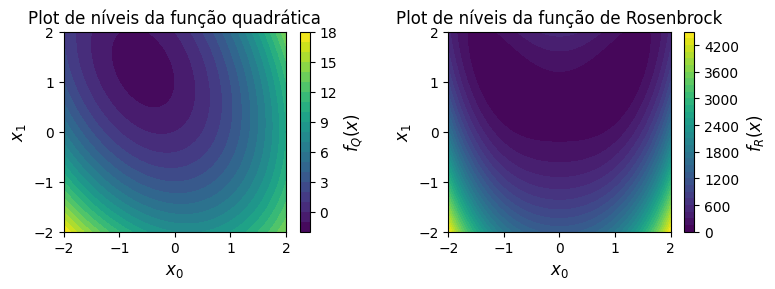

In [183]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)
functionValuesQ = fQ(x0, x1)
functionValuesR = fR(x0, x1)

# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot de níveis da função quadrática', fontsize=12)
ax1.axis('tight')

# Plot da função de Rosenbrock
contour2 = ax2.contourf(x0, x1, functionValuesR, levels=30, cmap='viridis')
colorBar2 = fig.colorbar(contour2, ax=ax2)
colorBar2.set_label(label='$f_R(x)$', fontsize=12)
ax2.set_xlabel('$x_0$', fontsize=12)
ax2.set_ylabel('$x_1$', fontsize=12)
ax2.set_title('Plot de níveis da função de Rosenbrock', fontsize=12)
ax2.axis('tight')

plt.tight_layout()
plt.show()

## Criando um corte da função gradiente 

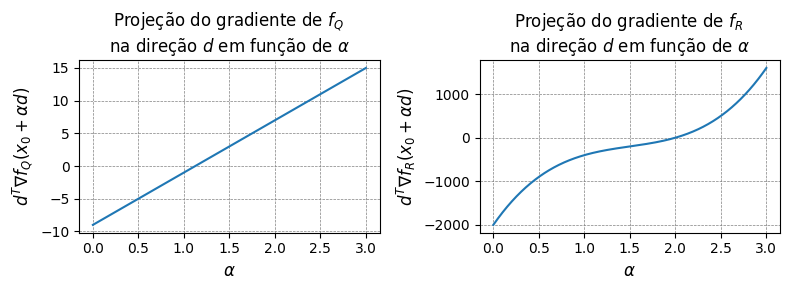

In [58]:
# Calculando valores das funções 
alphas = np.linspace(0, 3, 1000)
direction = np.array([1,1])
shift = np.array([-1,-1])
points = np.array([alpha * direction + shift for alpha in alphas])

quadraticGradientCut = partial(quadraticGradientCut, shift=shift, direction=direction)
rosenbrockGradientCut = partial(rosenbrockGradientCut, shift=shift, direction=direction)

quadraticGradientValues = np.array([quadraticGradientCut(alpha=alpha) for alpha in alphas])
rosenbrockGradientValues = np.array([rosenbrockGradientCut(alpha=alpha) for alpha in alphas])


# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
ax1.grid(color='gray', linestyle='--', linewidth=0.5, zorder=1)
ax1.plot(alphas, quadraticGradientValues, zorder=2)
ax1.set_xlabel('$\\alpha$', fontsize=12)
ax1.set_ylabel('$d^{T}\\nabla f_Q(x_0 + \\alpha d)$', fontsize=12)
ax1.set_title('Projeção do gradiente de $f_Q$ \nna direção $d$ em função de $\\alpha$', fontsize=12)
ax1.axis('tight')

# Plot da função de Rosenbrock
ax2.grid(color='gray', linestyle='--', linewidth=0.5, zorder=1)
ax2.plot(alphas, rosenbrockGradientValues, zorder=2)
ax2.set_xlabel('$\\alpha$', fontsize=12)
ax2.set_ylabel('$d^{T}\\nabla f_R(x_0 + \\alpha d)$', fontsize=12)
ax2.set_title('Projeção do gradiente de $f_R$ \nna direção $d$ em função de $\\alpha$', fontsize=12)
ax2.axis('tight')

plt.tight_layout()
plt.show()

## Implementando algoritmo de busca em linha

O objetivo do método da falsa posição é encontrar os pontos onde uma dada função $f(x)$ se torna nula. Ao aplicarmos isso no gradiente de nossas funções, encontramos os seus pontos de estacionaridade, e portanto seus pontos de mínimo, máximo ou inflexão.

In [63]:
def FalsePosition(function:callable, initialPoints:np.ndarray, precision:float, maxIter:int=10):

    currentPrecision = np.inf
    zeroCrossing = None
    iterations = 0
    a = initialPoints[0]
    b = initialPoints[1]
    
    while currentPrecision > precision and maxIter > iterations:
        iterations = iterations + 1
        c = ( a*function(alpha=b) - b*function(alpha=a) )/( function(alpha=b) - function(alpha=a) )
        if np.sign(function(alpha=c)) == np.sign(function(alpha=a)):
            a = c
        else:
            b = c
        currentPrecision = np.abs(function(alpha=c))

    zeroCrossing = c

    return zeroCrossing, currentPrecision, iterations

In [71]:
precision = 0.1
maxIter = 10000
a0 = 0
b0 = 3
direction = np.array([1,1])
shift = np.array([-1,-1])

fixedGradientCut = partial(quadraticGradientCut, shift=shift, direction=direction)

zeroCrossing, currentPrecision, iterations = FalsePosition(fixedGradientCut, [a0, b0], precision, maxIter=maxIter)

quadraticStationaryPoint = shift + zeroCrossing*direction

print(zeroCrossing, currentPrecision, iterations)

1.125 0.0 1


In [72]:
precision = 0.001
maxIter = 10000
a0 = 0
b0 = 3
direction = np.array([1,1])
shift = np.array([-1,-1])

fixedGradientCut = partial(rosenbrockGradientCut, shift=shift, direction=direction)

zeroCrossing, currentPrecision, iterations = FalsePosition(fixedGradientCut, [a0, b0], precision, maxIter=maxIter)

rosenbrockStationaryPoint = shift + zeroCrossing*direction

print(zeroCrossing, currentPrecision, iterations)

1.999998768093161 0.000739143192840126 28


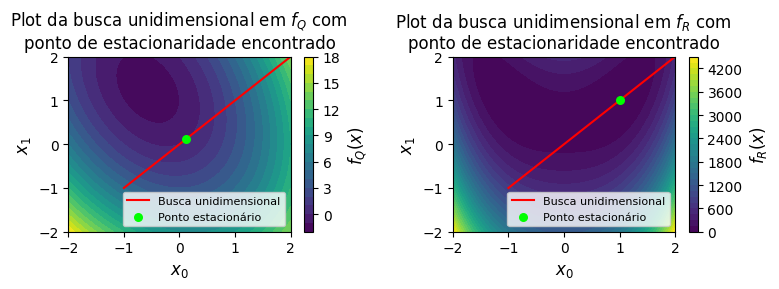

In [78]:
# Calculando valores das funções 
x0 = np.linspace(-2, 2, 1000)
x1 = np.linspace(-2, 2, 1000)
functionValuesQ = fQ(x0, x1)
functionValuesR = fR(x0, x1)
direction = np.array([1,1])
shift = np.array([-1,-1])
alphas = np.linspace(0, 3, 1000)

points = np.array([alpha * direction + shift for alpha in alphas])

# Criando plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot da função quadrática
contour1 = ax1.contourf(x0, x1, functionValuesQ, levels=20, cmap='viridis')
colorBar1 = fig.colorbar(contour1, ax=ax1)
colorBar1.set_label(label='$f_Q(x)$', fontsize=12)
ax1.set_xlabel('$x_0$', fontsize=12)
ax1.set_ylabel('$x_1$', fontsize=12)
ax1.set_title('Plot da busca unidimensional em $f_Q$ com \nponto de estacionaridade encontrado', fontsize=12)
ax1.axis('tight')

# Plot da linha referente à busca unidimensional e o ponto estacionário encontrado
ax1.plot(points[:, 0], points[:, 1], color='red', zorder=2, label='Busca unidimensional')
ax1.scatter(quadraticStationaryPoint[0], quadraticStationaryPoint[1], color='lime', s=30, zorder=3, label='Ponto estacionário')
ax1.legend(loc='lower right', fontsize=8)

# Plot da função de Rosenbrock
contour2 = ax2.contourf(x0, x1, functionValuesR, levels=30, cmap='viridis')
colorBar2 = fig.colorbar(contour2, ax=ax2)
colorBar2.set_label(label='$f_R(x)$', fontsize=12)
ax2.set_xlabel('$x_0$', fontsize=12)
ax2.set_ylabel('$x_1$', fontsize=12)
ax2.set_title('Plot da busca unidimensional em $f_R$ com \nponto de estacionaridade encontrado', fontsize=12)
ax2.axis('tight')

# Plot da linha referente à busca unidimensional e o ponto estacionário encontrado
ax2.plot(points[:, 0], points[:, 1], color='red', zorder=2, label='Busca unidimensional')
ax2.scatter(rosenbrockStationaryPoint[0], rosenbrockStationaryPoint[1], color='lime', s=30, zorder=3, label='Ponto estacionário')
ax2.legend(loc='lower right', fontsize=8)


plt.tight_layout()
plt.show()

# Trabalho 2
 O objetivo agora é implementar métodos de otimização em sua totalidade, e analisar seu comportamento nas mesmas funções do trabalho 1. Aqui, iremos estudar os algoritmos de descida de gradiente e de Newton. 